In [1]:
import numpy as pd
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set()

In [2]:
df = pd.read_csv('Top_200_Movies_Dataset_2023.csv')

In [3]:
#Strip and lowercase columns names
df.columns = df.columns.str.strip().str.lower()
#df.columns = df.columns.str.strip()
#df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = [col.strip() for col in df.columns]

In [4]:
df.head()

,rank,title,theaters,total gross,release date,distributor
0,1,Barbie,"4,337","$594,254,460",7/21/2023 0:00,Warner Bros.
1,2,The Super Mario Bros. Movie,"4,371","$574,759,600",4/5/2023 0:00,Universal Pictures
2,3,Spider-Man: Across the Spider-Verse,"4,332","$381,178,195",6/2/2023 0:00,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,"4,450","$358,995,815",5/5/2023 0:00,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,"3,761","$300,144,670",7/21/2023 0:00,Universal Pictures


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          199 non-null    int64 
 1   title         199 non-null    object
 2   theaters      199 non-null    object
 3   total gross   199 non-null    object
 4   release date  199 non-null    object
 5   distributor   199 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


In [6]:
df['release date'] = df['release date'].astype('datetime64[ns]')
df['total gross'] = df['total gross'].str.replace('$', '').str.replace(',', '').astype(float)



In [7]:
df['release date'] = pd.to_datetime(df['release date'])

# Extract only the date portion and replace the original column
df['release date'] = df['release date'].dt.date


In [8]:
#df['theaters'] = df['theaters'].str.replace(',', '').astype(float)
df['theaters'] = pd.to_numeric(df['theaters'].str.replace(',', ''), errors='coerce')


In [9]:
df['total gross'].head()

0   594,254,460.00
1   574,759,600.00
2   381,178,195.00
3   358,995,815.00
4   300,144,670.00
Name: total gross, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          199 non-null    int64  
 1   title         199 non-null    object 
 2   theaters      198 non-null    float64
 3   total gross   199 non-null    float64
 4   release date  199 non-null    object 
 5   distributor   199 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


In [11]:
df[['total gross']].describe().T

,count,mean,std,min,25%,50%,75%,max
total gross,199.00,"38,925,729.32","98,850,112.22","161,222.00","686,234.50","3,541,159.00","20,442,172.00","684,075,767.00"


In [12]:
min = df['total gross'].min()
q1 =  df['total gross'].quantile(0.25)
q2 =  df['total gross'].median()     # == quantile(0.5)
q3 =  df['total gross'].quantile(0.75)
IQR = q3 - q1
LB = q1 - (1.5 * IQR)
UB = q3 + (1.5 * IQR)

print(f'min = {min} ,  q1 = {q1} ,  q2 = {q2}  , q3 = {q3}  , IQR = {IQR} ,  LB = {LB} ,  UB = {UB}')

min = 161222.0 ,  q1 = 686234.5 ,  q2 = 3541159.0  , q3 = 20442172.0  , IQR = 19755937.5 ,  LB = -28947671.75 ,  UB = 50076078.25


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total gross'>

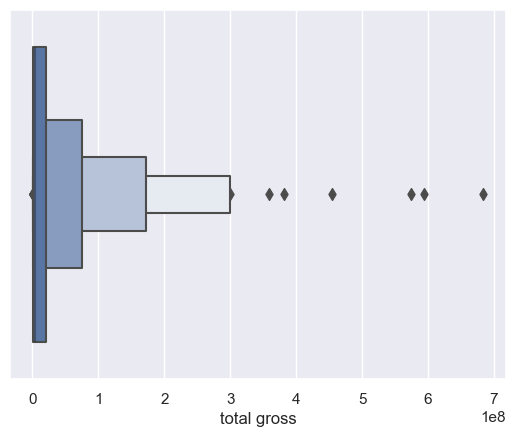

In [13]:
sns.boxenplot(data=df , x='total gross')

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

<Axes: xlabel='distributor', ylabel='total gross'>

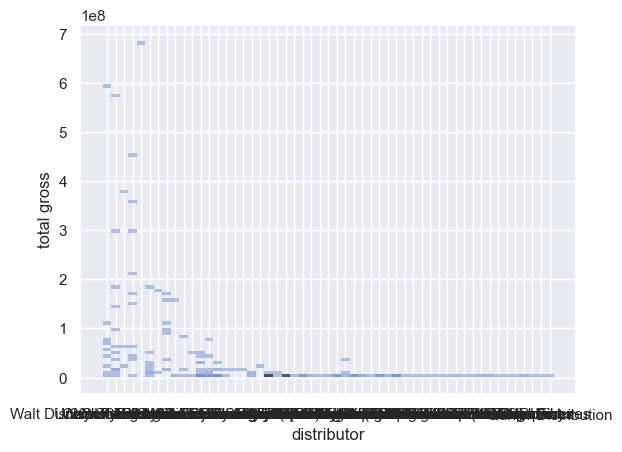

In [14]:
sns.histplot(data=df, x='distributor', y='total gross',kde=True)

#plt.title('Destribution of Total gross invoices')

#plt.xlabel('Distributor')

#plt.ylabel('Total Gross')

#plt.axvline(df['total gross'].mean() , color='red')

#plt.axvline(df['total gross'].median() , color='black')


# chart 1 : Total revenue by distributor

In [15]:
#fig = px.bar(data_frame=df , x= 'distributor' , y='total gross' , title='Total revenue by Distributor',labels={'distributor' : 'Distributor' , 
#'totalgross' : 'Total Revenue'})
#fig.update_layout(title_x=0.5)
fig = px.bar(data_frame=df, x='distributor', y='total gross', title='Total Revenue by Distributor',
            labels={'distributor': 'Distributor', 'total gross': 'Total Revenue'} ,color='distributor')
fig.update_layout(title_x=0.5)
fig.update_layout(
    autosize=True,
    width=750,
    height=750,
)





# Chart 2: Total Revenue by Distributor by Pie chart

In [16]:
df_sorted = df.sort_values(by='total gross', ascending=False)
df_top10 = df_sorted.head(10)
fig = px.pie(data_frame=df_top10, names='distributor', values='total gross', title='Top 10 Distributors by Total Gross')
fig.update_layout(title_x=0.4)
fig.show()

In [17]:
#fig=px.bar(data_frame=df.distributor.value_counts() )  
#fig.update_layout(
 #   autosize=True,
  #  width=750,
   # height=750,
#)

# Chart 3: NO.of movies produced by Distributors per year

In [18]:
distributor_counts = df['distributor'].value_counts().reset_index()
distributor_counts.columns = ['distributor', 'count']

# Create the bar chart using Plotly Express
fig = px.bar(data_frame=distributor_counts, x='distributor', y='count',  color='distributor')

fig.update_layout(
    autosize=True,
    width=800,
    height=800,
    xaxis_title='Distributor',
    yaxis_title='Frequency',
    title='Distribution of Movies by Distributor',
    title_x=0.5
)

fig.show()








# Chart 4: Total Revenue by Release Month 

In [19]:
multivar = df[["release date" , "distributor" , "total gross"]]
multivar.head()

,release date,distributor,total gross
0,2023-07-21,Warner Bros.,"594,254,460.00"
1,2023-04-05,Universal Pictures,"574,759,600.00"
2,2023-06-02,Columbia Pictures,"381,178,195.00"
3,2023-05-05,Walt Disney Studios Motion Pictures,"358,995,815.00"
4,2023-07-21,Universal Pictures,"300,144,670.00"


In [20]:
multivar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release date  199 non-null    object 
 1   distributor   199 non-null    object 
 2   total gross   199 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [21]:
multivar['release date'] = multivar['release date'].astype('datetime64[ns]')

C:\Users\pc\AppData\Local\Temp\ipykernel_16904\3433004278.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
multivar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release date  199 non-null    datetime64[ns]
 1   distributor   199 non-null    object        
 2   total gross   199 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB


In [23]:
multivar['release date'] = multivar['release date'].dt.to_period('M')

C:\Users\pc\AppData\Local\Temp\ipykernel_16904\3979480530.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
multivar.groupby(['release date' , 'distributor'] , as_index=False)['total gross'].sum().sort_values(by='total gross' , ascending=False)
multivar.head()

,release date,distributor,total gross
0,2023-07,Warner Bros.,"594,254,460.00"
1,2023-04,Universal Pictures,"574,759,600.00"
2,2023-06,Columbia Pictures,"381,178,195.00"
3,2023-05,Walt Disney Studios Motion Pictures,"358,995,815.00"
4,2023-07,Universal Pictures,"300,144,670.00"


In [25]:
multivar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   release date  199 non-null    period[M]
 1   distributor   199 non-null    object   
 2   total gross   199 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 4.8+ KB


In [26]:
multivar['release date'] = multivar['release date'].dt.to_timestamp()

C:\Users\pc\AppData\Local\Temp\ipykernel_16904\1489807587.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
fig = px.bar(data_frame=multivar , x='release date' , y='total gross' , 
            #color='distributor' 
                title='Total Revenue by Release Month',
labels={'release date' : 'Release Date' , 'distributor' : 'Distributor' , 'total gross' : 'Total Gross'})

fig.update_layout(title_x=0.5)
fig.show()

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# chart 5: Total Revenue for each distributor per month

In [28]:
fig = px.scatter(data_frame=multivar , x='release date' , y='total gross' , color='distributor' , size='total gross'  ,title='Total Revenue by Release Month',
labels={'release date' : 'Release Date' , 'distributor' : 'Distributor' , 'total gross' : 'Total Gross'})

fig.update_layout(title_x=0.5)
fig.show()

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Chart 6: Number of Movies by Release Month

In [29]:
from collections import Counter

In [30]:
bivar = df[[ 'release date','title']]
bivar = bivar.set_index('release date')
bivar.head()

,title
release date,
2023-07-21,Barbie
2023-04-05,The Super Mario Bros. Movie
2023-06-02,Spider-Man: Across the Spider-Verse
2023-05-05,Guardians of the Galaxy Vol. 3
2023-07-21,Oppenheimer


In [31]:
df['release date'] = pd.to_datetime(df['release date'])
df.set_index('release date', inplace=True)

In [32]:
bivar = df['title'].resample(rule='1M').nunique()
bivar.head()

release date
2023-01-31    22
2023-02-28    23
2023-03-31    26
2023-04-30    29
2023-05-31    22
Freq: M, Name: title, dtype: int64

In [33]:
px.bar(data_frame=bivar)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [34]:
px.line(data_frame=bivar)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [35]:
#bivar['release date'] = bivar['release date'].astype('datetime64[ns]')

In [36]:
#bivar['release date'] = bivar['release date'].dt.to_timestamp()

In [37]:
#bivar['release date'] = bivar['release date'].dt.to_period('M')

In [38]:
#bivar.head()

In [39]:
#bivar.groupby('title')['release date']